### Ejercicio 4

In [1]:
#Import libraries
import numpy as np

In [2]:
#Defino ctes


C_hat = 1 #[mS]
g_K_adim = 36
g_Na_adim = 120
g_L_adim = 0.3

V_K = -77 #[mV]
V_Na = 50 #[mV]
V_L = -54.4 #[mV]


#Defino funciones
def m_inf(V):

    a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
    b_m = 4*np.exp(-(V + 65)/18)

    return a_m/(a_m + b_m)

def h_inf(V):
        
    a_h = 0.07*np.exp(-(V + 65)/20)
    b_h = 1/(1 + np.exp(-(V + 35)/10))

    return a_h/(a_h + b_h)

def n_inf(V):
    
    a_n = 0.01*(V + 55)/(1 - np.exp(-(V + 55)/10))
    b_n = 0.125*np.exp(-(V + 65)/80)

    return a_n/(a_n + b_n)

def tau_m(V):
        
    a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
    b_m = 4*np.exp(-(V + 65)/18)

    return 1/(a_m + b_m)

def tau_h(V):

    a_h = 0.07*np.exp(-(V + 65)/20)
    b_h = 1/(1 + np.exp(-(V + 35)/10))

    return 1/(a_h + b_h)

def tau_n(V):
    
    a_n = 0.01*(V + 55)/(1 - np.exp(-(V + 55)/10))
    b_n = 0.125*np.exp(-(V + 65)/80)

    return 1/(a_n + b_n)


In [3]:
#Defino derivada

def derivada(t, y, I_ext):
    '''
    
    

    C_hat = C / g_hat : [ms = mili segundos]
    I_ext : [muA/cm2]
    V: [mV]
    
    Derivada
    y[0]: V
    y[1]: m
    y[2]: h
    y[3]: n
    
    '''

    #Def derivative vector
    dydt = np.empty(4)

    #Asigno variables
    V = y[0]; m = y[1]; h = y[2]; n = y[3]

    #Eq of charge conservation
    dydt[0] = (1/C_hat) *(I_ext - g_K_adim*n**4*(V - V_K) - g_Na_adim*m**3*h*(V - V_Na) - g_L_adim*(V - V_L))

    #Eq's m, h, n
    dydt[1] = (m_inf(V) - m)/tau_m(V)
    dydt[2] = (h_inf(V) - h)/tau_h(V)
    dydt[3] = (n_inf(V) - n)/tau_n(V)


    return dydt

In [4]:
#Condiciones iniciales
V0 = -77
y0_vec = np.array([V0, m_inf(V0), h_inf(V0), n_inf(V0)])

In [5]:
#Resuelvo numéricamente
from scipy.integrate import solve_ivp

t_ini = 0
t_fin = 1000 #[ms]

I_ext = 12

soln = solve_ivp(derivada, [t_ini, t_fin], y0_vec, method = "RK45", args = (I_ext,))

C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:17: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:18: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:38: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:39: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3530957316.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  dydt[1] = (m_inf(V) - m)/tau_m(V)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:24: RuntimeWarning: overflow encountered in exp
  a_h = 0.07*np.exp(-(V + 65)/20)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:25: RuntimeWarning: 

In [6]:
import ipywidgets as widgets
from IPython.display import display

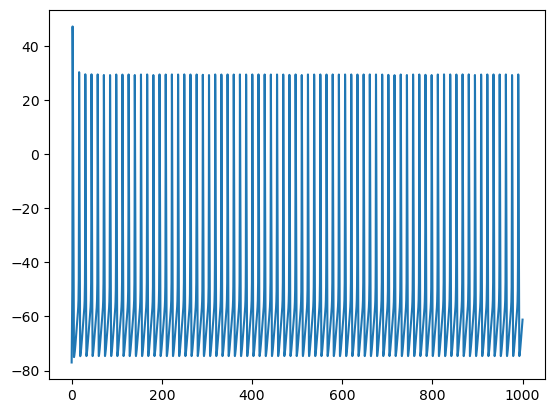

In [7]:
#Grafico V vs t para distintas corrientes (gráfico interactivo)

import matplotlib.pyplot as plt

plt.plot(soln.t, soln.y[0])

In [8]:
def solve_and_plot(I_ext):
    t_ini = 0
    t_fin = 100 #[ms]
    
    soln = solve_ivp(derivada, [t_ini, t_fin], y0_vec, method="RK45", args=(I_ext,))
    plt.plot(soln.t, soln.y[0])
    plt.ylabel("V (mV)")
    plt.xlabel("t (ms)")
    plt.ylim([-100,50])
    plt.show()
    

# Widget interactivo
widgets.interact(solve_and_plot, I_ext=widgets.FloatSlider(min=0, max=20, step=0.1, value=5))


interactive(children=(FloatSlider(value=5.0, description='I_ext', max=20.0), Output()), _dom_classes=('widget-…

<function __main__.solve_and_plot(I_ext)>

In [9]:
#Determino la frecuencia de los pulsos presentes en V(t) y grafico el espectro de frecuencias

#Importo las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

#Defino la función que cuenta el número de picos que tiene el voltaje en función del tiempo
def frec_pulsos(t_vec, V_vec):
    '''
    
    Debería dejar pasar algunos pasos
    '''
    umbral = 10

    n = 0
    for i in range(len(V_vec)):
        if V_vec[i]>umbral and pico == False:
            n += 1
            pico = True
            continue
        if V_vec[i]<umbral:
            pico = False
            continue

    return n/(t_vec[-1]-t_vec[0])




#Defino la función que calcula la frecuencia de pulsos en función de I_ext
def frec_pulsos_I(I_ext):

    #Resuelvo el sistema de ecuaciones
    t_ini = 0
    t_fin = 1000 #[ms]
    soln = solve_ivp(derivada, [t_ini, t_fin], y0_vec, method="RK45", args=(I_ext,));

    t = soln.t
    V = soln.y[0]

    #Calculo la frecuencia de pulsos
    frec = frec_pulsos(t,V)

    return frec


In [10]:
frec_pulsos_I(14)



C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:17: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:18: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:38: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:39: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3530957316.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  dydt[1] = (m_inf(V) - m)/tau_m(V)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:24: RuntimeWarning: overflow encountered in exp
  a_h = 0.07*np.exp(-(V + 65)/20)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:25: RuntimeWarning: 

0.077

In [11]:
#Calculo la frecuencia para distintos valores de corriente
I_ext_vec = np.linspace(0,14, num = 40)
frec_vec = np.empty(len(I_ext_vec))

for i in range(len(I_ext_vec)):
    frec_vec[i] = frec_pulsos_I(I_ext_vec[i])
    print("Porcentaje de cálculo: ", i/len(I_ext_vec)*100, " %")


Porcentaje de cálculo:  0.0  %


C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:17: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:18: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:38: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:39: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3530957316.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  dydt[1] = (m_inf(V) - m)/tau_m(V)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:24: RuntimeWarning: overflow encountered in exp
  a_h = 0.07*np.exp(-(V + 65)/20)
C:\Users\lupam\AppData\Local\Temp\ipykernel_10632\3441978128.py:25: RuntimeWarning: 

Porcentaje de cálculo:  2.5  %
Porcentaje de cálculo:  5.0  %
Porcentaje de cálculo:  7.5  %
Porcentaje de cálculo:  10.0  %
Porcentaje de cálculo:  12.5  %
Porcentaje de cálculo:  15.0  %
Porcentaje de cálculo:  17.5  %
Porcentaje de cálculo:  20.0  %
Porcentaje de cálculo:  22.5  %
Porcentaje de cálculo:  25.0  %
Porcentaje de cálculo:  27.500000000000004  %
Porcentaje de cálculo:  30.0  %
Porcentaje de cálculo:  32.5  %
Porcentaje de cálculo:  35.0  %
Porcentaje de cálculo:  37.5  %
Porcentaje de cálculo:  40.0  %
Porcentaje de cálculo:  42.5  %
Porcentaje de cálculo:  45.0  %
Porcentaje de cálculo:  47.5  %
Porcentaje de cálculo:  50.0  %
Porcentaje de cálculo:  52.5  %
Porcentaje de cálculo:  55.00000000000001  %
Porcentaje de cálculo:  57.49999999999999  %
Porcentaje de cálculo:  60.0  %
Porcentaje de cálculo:  62.5  %
Porcentaje de cálculo:  65.0  %
Porcentaje de cálculo:  67.5  %
Porcentaje de cálculo:  70.0  %
Porcentaje de cálculo:  72.5  %
Porcentaje de cálculo:  75.0  %
Por

Text(0.5, 0, 'I_ext [mA]')

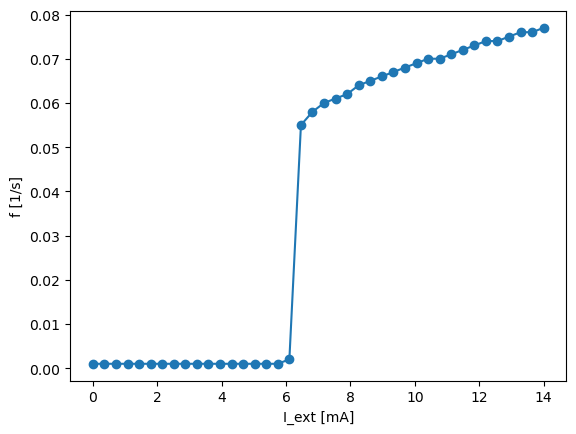

In [12]:
#Grafico
plt.plot(I_ext_vec, frec_vec, "-o")
plt.ylabel("f [1/s]")
plt.xlabel("I_ext [mA]")